In [ ]:
!curl -s https://course.fast.ai/setup/colab | bash


Updating fastai...
Done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
    root_dir = "/content/drive/My Drive/" 
    base_dir = root_dir + 'fastai-v3/' 

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.vision import error_rate 

In [ ]:
bs = 64

### Getting images from google drive


In [ ]:
fname_0 = get_image_files(root_dir + '/navy/non threat ship')

In [ ]:
fname_0[:5]

[PosixPath('/content/drive/My Drive/navy/non threat ship/3.Container_ships_President_Truman_%28IMO_8616283%29_and_President_Kennedy_%28IMO_8616295%29_at_San_Francisco.jpg'),
 PosixPath('/content/drive/My Drive/navy/non threat ship/4.shutterstock_679310377-800x533.jpg'),
 PosixPath('/content/drive/My Drive/navy/non threat ship/5._108641470_p07mmt1g.jpg'),
 PosixPath('/content/drive/My Drive/navy/non threat ship/6.Evac-solutions-for-Cargo-vessels.jpg'),
 PosixPath('/content/drive/My Drive/navy/non threat ship/8.gettyimages-176619985-e1535488791582.jpg')]

In [ ]:
fname_1 = get_image_files(root_dir + '/navy/threat ship')

In [ ]:
fname_1[:5]

[PosixPath('/content/drive/My Drive/navy/threat ship/6.1280px-Defense.gov_News_Photo_001207-N-2781V-501_0_0_0.jpg'),
 PosixPath('/content/drive/My Drive/navy/threat ship/8.uss-iowa-bb61-battleship-united-states-navy.jpg'),
 PosixPath('/content/drive/My Drive/navy/threat ship/9.t1yan3k3kibfowdh6jgb.jpg'),
 PosixPath('/content/drive/My Drive/navy/threat ship/10.iixjog7i9vyxkx52ilfy.jpg'),
 PosixPath('/content/drive/My Drive/navy/threat ship/11.5a539d283225de2b1a8b4cee-750-375.jpg')]

In [ ]:
np.random.seed(42)

In [ ]:
fnames = fname_0 + fname_1
print(len(fnames))

403


### Labelling the data

In [ ]:
labels = [('non threat ship' if 'non threat ship' in str(x) else 'threat ship') for x in fnames]
labels[:5]

['non threat ship',
 'non threat ship',
 'non threat ship',
 'non threat ship',
 'non threat ship']

In [ ]:
fnames[:5]

[PosixPath('/content/drive/My Drive/navy/non threat ship/3.Container_ships_President_Truman_%28IMO_8616283%29_and_President_Kennedy_%28IMO_8616295%29_at_San_Francisco.jpg'),
 PosixPath('/content/drive/My Drive/navy/non threat ship/4.shutterstock_679310377-800x533.jpg'),
 PosixPath('/content/drive/My Drive/navy/non threat ship/5._108641470_p07mmt1g.jpg'),
 PosixPath('/content/drive/My Drive/navy/non threat ship/6.Evac-solutions-for-Cargo-vessels.jpg'),
 PosixPath('/content/drive/My Drive/navy/non threat ship/8.gettyimages-176619985-e1535488791582.jpg')]

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

data = ImageDataBunch.from_lists("", fnames,labels=labels, ds_tfms=get_transforms(), size=24,bs=bs ).normalize()
data.classes

['non threat ship', 'threat ship']

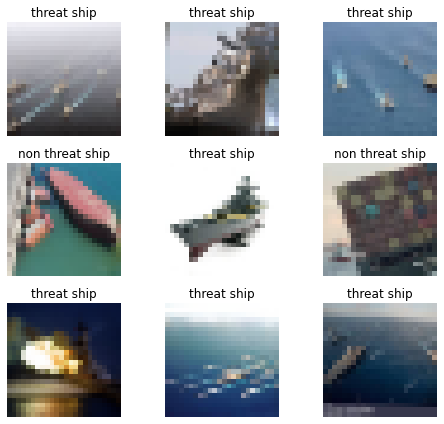

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
print(data.classes)
len(data.classes), data.c

['non threat ship', 'threat ship']


(2, 2)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.175264,0.479289,0.212500,00:45
1,0.902647,0.298767,0.087500,00:16
2,0.804212,0.345420,0.112500,00:16
3,0.741952,0.374706,0.112500,00:17


In [ ]:
learn.save('stage-1')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

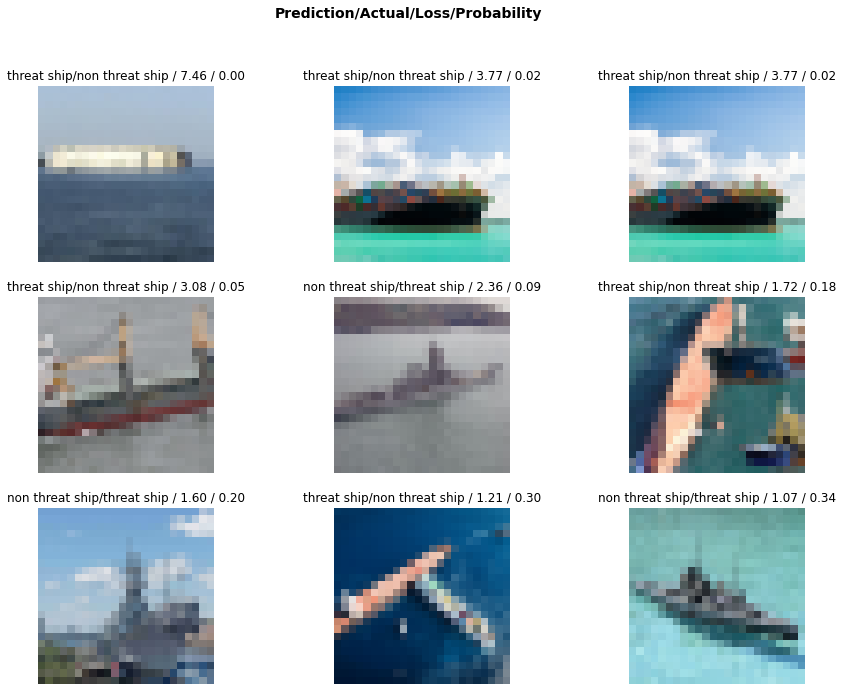

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

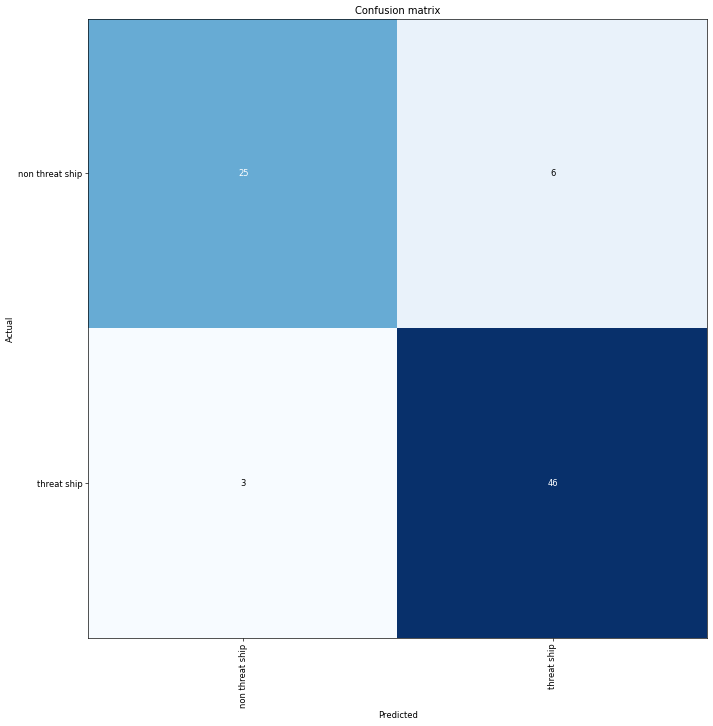

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
# finding the optimal learning rate

learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


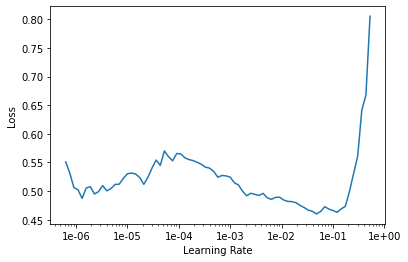

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-03, 1e-01))

epoch,train_loss,valid_loss,error_rate,time
0,2.418867,130074640.000000,0.612500,00:15
1,2.183990,9876.251953,0.612500,00:16


In [ ]:
learn.save('stage1-lr')